# Part 1: The Sampling Theorem and its Implications


## What is a signal?

A signal can be thought of as any measurement that varies over some dimension. Signals can be continuous (analog) or discrete (digital). They may or may not contain any obvious information, but it is their ability to carry meaningful information that interests us.

Lets take a look at a simple signal, a sine wave:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

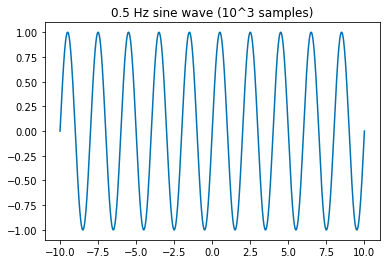

In [2]:
f = 1/2
n_samples = 1000

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

plt.plot(x,y)
plt.title('0.5 Hz sine wave (10^3 samples)');

Here we have created a sine wave with a frequency of 0.5 Hz. `np.linspace` was used to create the x coordinates (1000 values, spaced evenly from -10 to 10, inclusive). The y coordinates are thus based on the $sin$ function. The plot looks smooth, mainly because we have many samples used to draw the curve.


Lets take a look at what happens if we reduce the number of samples in our sine wave:

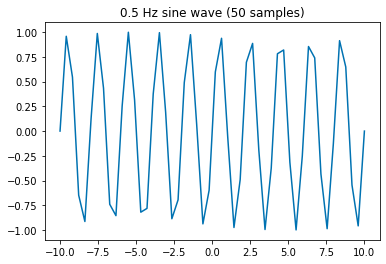

In [3]:
f = 1/2
n_samples = 50

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

plt.plot(x,y)
plt.title('0.5 Hz sine wave (50 samples)');

This looks a bit jagged, but it is still clear that this is a wave-like signal with a frequency of 0.5 Hz. We will revisit the sampling rate, but for now the important thing to understand that this is a signal that carries some information. In this case, the information is a frequency (0.5 Hz).

Not everything that looks like a signal necessarily carries information:

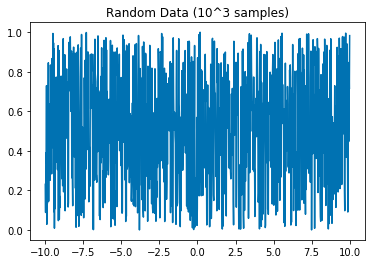

In [4]:
from numpy.random import random

n_samples = 1000
x = np.linspace(-10, 10, n_samples)
y = random(n_samples)

plt.plot(x,y)
plt.title('Random Data (10^3 samples)');

Since this example contains random data, some might say that this is not a true signal, as it is not carrying information. Actually, there is some information here about the structure of the "noise" (e.g., values appear to have upper and lower bounds, follow a uniform distribution, etc.). Regardless, we could use signal processing techniques to inspect these data.

Importantly, real-world measurements tend to contain "real" signal components and "noise" components:

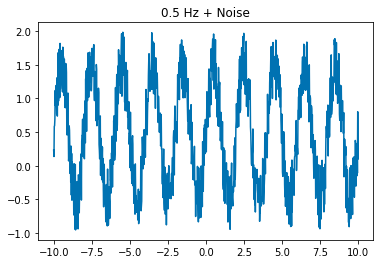

In [5]:
f = 1/2
n_samples = 1000

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))
noise = random(n_samples) # make noise
y = y + noise # add noise

plt.plot(x,y)
plt.title('0.5 Hz + Noise');

Since the noise level is not terribly high compared to the "real" signal, it is still pretty easy to see the information (0.5 Hz) carried by this measurement.

When noise levels are higher, this becomes a much more difficult task:

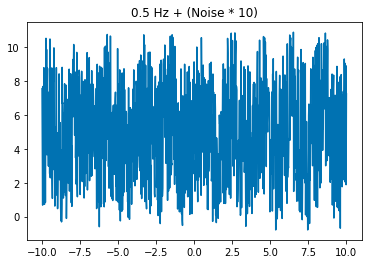

In [6]:
f = 1/2
n_samples = 1000
noise_level = 10

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))
noise = random(n_samples) * noise_level
y = y + noise

plt.plot(x,y)
plt.title('0.5 Hz + (Noise * 10)');

Most signals we want to analyze are much more complex than simple sine waves:

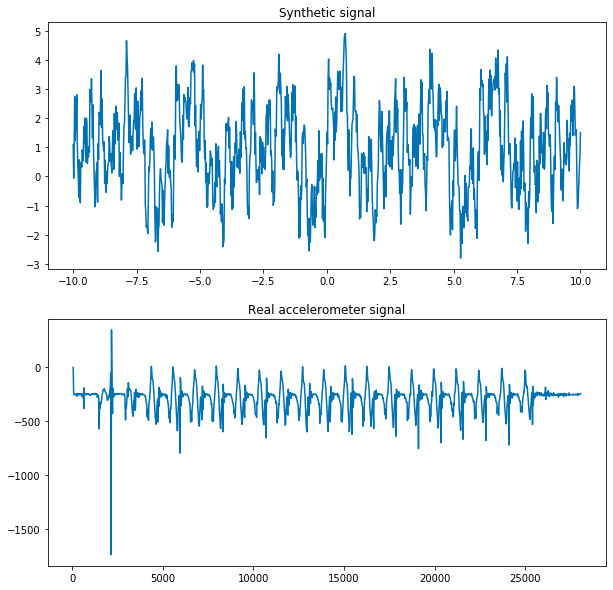

In [7]:
import pandas as pd

# synthetic "real" signal
f = [1/2, 1/3, 2, 3]
n_samples = 1000
noise_level = 2
x = np.linspace(-10, 10, n_samples)
y = [np.sin(x*freq*(2*np.pi)) for freq in f] # create signal for each frequency
y = np.array(y).sum(axis=0) # sum up all frequencies
noise = random(n_samples) * noise_level
y = y + noise

# real signal from accelerometer
walk = pd.read_csv('../data/walk1.csv', header = None)
walk.columns = ['x', 'y', 'z', 't']


# plot
fig, ax = plt.subplots(2, figsize=(10,10))
ax[0].set_title('Synthetic signal')
ax[0].plot(x, y)
ax[1].set_title('Real accelerometer signal')
ax[1].plot(walk.t, walk.x);



Looking at these plots, you can start to appreciate how it can be difficult to separate signal from noise. And even if you know what the real signal is, how do you start to make sense of it? These are the primary concerns of signal processing.

## Aliasing

In the first example above, we saw how sampling rate can affect the appearance of a signal. At a ~50 Hz sampling rate, our 0.5 Hz sine wave looked smooth. At a ~2.5 Hz sampling rate, the signal looked jagged, but we were still able to see something that looked like a 0.5 Hz sine wave.

Lets take a look at what happens when we sample at the same rate as the signal:

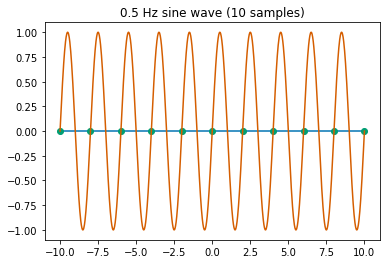

In [8]:
f = 1/2
n_samples = 11 # 0.5 Hz sampling plus endpoint

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

x_smooth = np.linspace(-10, 10, 1000)
y_smooth = np.sin(x_smooth*f*(2*np.pi))

plt.plot(x,y)
plt.plot(x,y, 'o')
plt.plot(x_smooth, y_smooth)
plt.title('0.5 Hz sine wave (10 samples)');

This doesn't look like a sine wave at all! In fact, we have apparently lost our signal. Lets take a look at some sampling rates near the frequency of the sine wave:

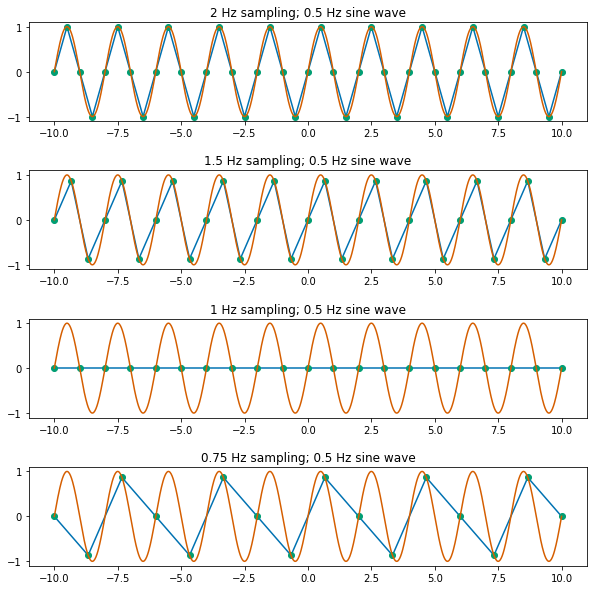

In [45]:
f = 1/2
n_samples = [41, 31, 21, 16]
rates = ['2 Hz', '1.5 Hz', '1 Hz', '0.75 Hz']

x = [np.linspace(-10, 10, n) for n in n_samples]
y = [np.sin(sig*f*(2*np.pi)) for sig in x]
x_smooth = np.linspace(-10, 10, 1000)
y_smooth = np.sin(x_smooth*f*(2*np.pi))

fig, ax = plt.subplots(len(n_samples), figsize=(10,10))
fig.subplots_adjust(hspace=.5)
for i in range(len(n_samples)):
    ax[i].set_title(rates[i] + " sampling; 0.5 Hz sine wave")
    ax[i].plot(x[i], y[i])
    ax[i].plot(x[i], y[i], 'o')
    ax[i].plot(x_smooth, y_smooth)

You can see that at 2 Hz and 1.5 Hz sampling, we get something that looks fairly accurate with respect to the frequency of the underlying sine wave. At 0.75 Hz sampling, we get a very inaccurate picture!

1 Hz sampling is an interesting case. Here, we lose our signal altogether, but watch what happens when we shift the sampling a bit along the time axis:

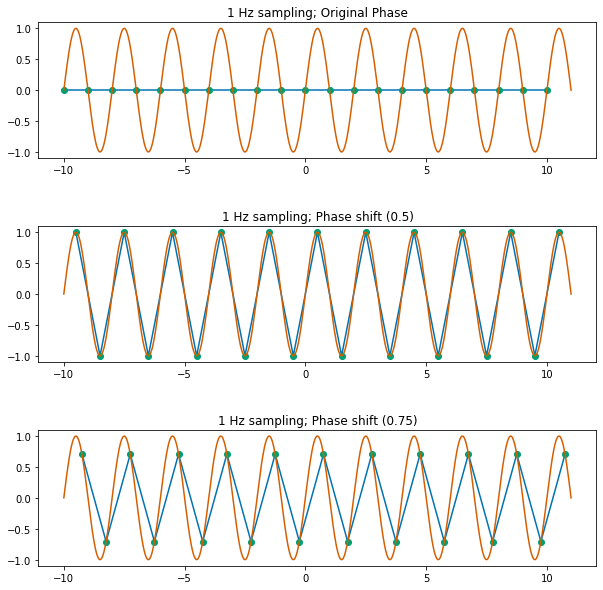

In [10]:
f = 1/2
n_samples = 21

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*f*(2*np.pi))

x_shift1 = x + 0.5
y_shift1 = np.sin(x_shift1*f*(2*np.pi))

x_shift2 = x + 0.75
y_shift2 = np.sin(x_shift2*f*(2*np.pi))

x_smooth = np.linspace(-10, 11, 1000)
y_smooth = np.sin(x_smooth*f*(2*np.pi))

fig, ax = plt.subplots(3, figsize=(10,10))
fig.subplots_adjust(hspace=.5)

ax[0].set_title('1 Hz sampling; Original Phase')
ax[0].plot(x, y)
ax[0].plot(x, y, 'o')
ax[0].plot(x_smooth, y_smooth)
ax[1].set_title('1 Hz sampling; Phase shift (0.5)')
ax[1].plot(x_shift1, y_shift1)
ax[1].plot(x_shift1, y_shift1, 'o')
ax[1].plot(x_smooth, y_smooth)
ax[2].set_title('1 Hz sampling; Phase shift (0.75)')
ax[2].plot(x_shift2, y_shift2)
ax[2].plot(x_shift2, y_shift2, 'o')
ax[2].plot(x_smooth, y_smooth);

Here we can see that 1 Hz sampling is sufficient to detect our 0.5 Hz signal, but only if we can sample across different phases. Note that this is very much not the case for lower sampling rates:

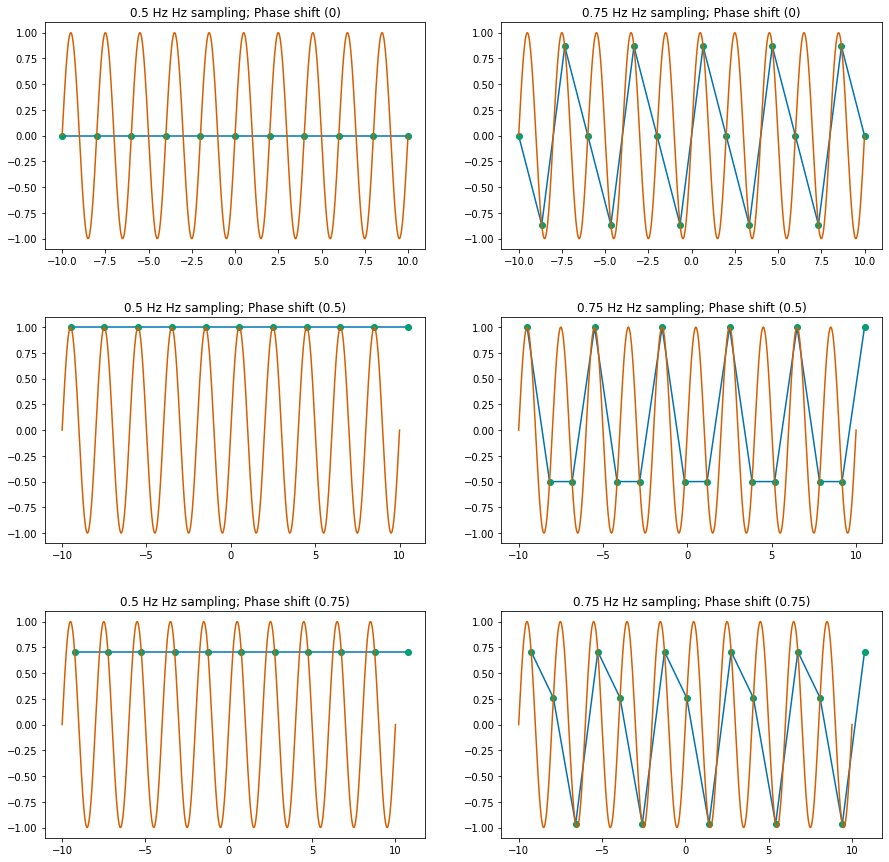

In [46]:
f = 1/2
n_samples = [11, 16]
rates = ['0.5 Hz', '0.75 Hz']
shifts = [0, 0.5, 0.75]
x_smooth = np.linspace(-10, 10, 1000)
y_smooth = np.sin(x_smooth*f*(2*np.pi))

rows = len(shifts)
cols = len(rates)

fig, ax = plt.subplots(nrows=rows,
                       ncols=cols,
                       figsize=(15,15))
fig.subplots_adjust(hspace=.3)

for col in range(cols):
    for row in range(rows):
        x = np.linspace(-10, 10, n_samples[col]) + shifts[row]
        y = np.sin(x*f*(2*np.pi))
        ax[row, col].set_title(f"{rates[col]} Hz sampling; "
                               f"Phase shift ({shifts[row]})")
        ax[row, col].plot(x, y)
        ax[row, col].plot(x, y, 'o')
        ax[row, col].plot(x_smooth, y_smooth)

So no matter what phase you sample at, if your sampling frequency is equal to your sine wave frequency, you won't be able to detect the sine wave. And when your sampling frequency is 1.5x your sine wave frequency, you end up with measurements that don't **determine** the sine wave. In fact, multiple different sine waves would "fit" the 0.75 Hz sampling case:

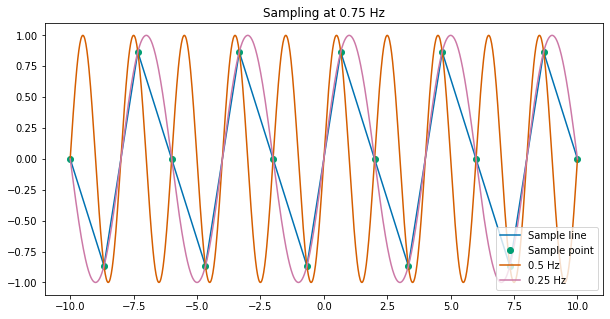

In [44]:
freqs = [1/2, 1/4]
n_samples = 16 #0.75 Hz

x = np.linspace(-10, 10, n_samples)
y = np.sin(x*freqs[0]*(2*np.pi))
x_smooth = np.linspace(-10, 10, 1000)

p = []
plt.figure(figsize=(10, 5))
p.append(plt.plot(x, y))
plt.plot(x, y, 'o')
plt.title('Sampling at 0.75 Hz')

for f in freqs:
    y_smooth = np.sin(x_smooth*f*(2*np.pi))
    plt.plot(x_smooth, y_smooth)
    
plt.legend(("Sample line","Sample point","0.5 Hz","0.25 Hz"), loc=4);

These simple examples have illustrated an import concept in signal processing called the **sampling theorem** (often called the **Nyquist-Shannon sampling theorem**). From Shannon's original paper (Proceedings of the Institute of Radio Engineers. 37 (1): 10–21):

> If a function $f ( t )$ contains no frequencies higher than W \[hertz\], it is completely determined by giving its ordinates at a series of points spaced $1 / ( 2 W )$ seconds apart.

The "contains no frequencies" and "completely determined" parts of the quote might not make a lot of sense to you now, but we will discuss what that means later. With regard to our simple case here, we can simplify - we can't accurately depict a sine wave unless we sample at least twice its frequency.

Moreoever, the phase relationship between the signal and our sampling matters!

In [36]:
p

([<matplotlib.lines.Line2D at 0x12405b310>],
 [<matplotlib.lines.Line2D at 0x1234ed090>])